In [10]:
# Import all the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Convert scientific values
pd.options.display.float_format = '{:.2f}'.format

In [12]:
# Regular expressions for manipulating strings
import re

In [13]:
# Ignore warnings caused by version issues
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Read CSV file
loan = pd.read_csv("loan.csv",dtype=object)

In [15]:
# Basic data about the dataframe
print(loan.shape)
print(loan.info())
print(loan.dtypes)

(11331, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 9.6+ MB
None
id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object


In [16]:
###### Data Cleaning ########
 #Get rid of Duplicate Rows,Duplicate Columns,NULL Rows,NULL Columns
 # Have only numbers in Employment length column
 # Convert NA to Not Known in pub_rec_bankruptcies
 # Convert to Numbers for the Amount/Payment related columns
#############################

In [17]:
# Use the id column to search the dataset for duplicate rows
print(loan.duplicated(subset=None, keep='first').count())
dup=loan[loan.duplicated(['id'])]
dup

11331


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [18]:
# Check and Remove empty rows
print('Number of Empty Rows:')
print(loan.isnull().all(axis=1).sum())

Number of Empty Rows:
0


In [19]:
# Check and Remove Empty Columns
print('Number of Empty Columns:')
print(loan.isnull().all(axis=0).sum())

Number of Empty Columns:
54


In [20]:
# Drop all the empty columns
loan = loan.dropna(how= "all", axis=1)

In [21]:
# Check the total columns now. It should be 111-54 = 57 columns
print(loan.shape)

(11331, 57)


In [22]:
# Observations:
# So, now we are left with 44 columns

In [23]:
# Data cleaning
# Let's format the employment length column with just numeric values. It might be significant for future analysis

loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan.head(2)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,16-May,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,13-Sep,0,1,INDIVIDUAL,0,0,0,0,0


In [24]:
# Data cleaning
# In pub_rec_bankruptcies, change NA to Not Known since this column may be useful for loan approvals or rejections.
loan.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(loan.pub_rec_bankruptcies.isnull().sum())

0


In [25]:
# Data cleaning
# Lets remove % symbol from intrest rate column so that it can be used in calculations
loan['int_rate'] = loan['int_rate'].str.rstrip('%')

In [26]:
# Convert amount columns to numeric data to discover any correlations between important ones

cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[cols1] = loan[cols1].apply(pd.to_numeric)

In [27]:
# Lets see distribution of Two loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")

<Figure size 1500x800 with 0 Axes>

Text(0.5, 0, 'Loan Amount')

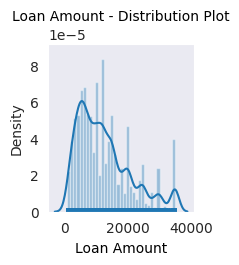

In [28]:
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=10,color='black')
ax.set_xlabel('Loan Amount',fontsize=10,color='black')

Text(0.5, 0, 'Funded Amount')

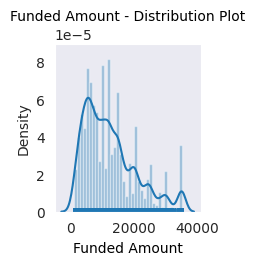

In [29]:
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loan['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=10,color='black')
ax.set_xlabel('Funded Amount',fontsize=10,color='black')

In [30]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")

<Figure size 1500x800 with 0 Axes>

Text(0.5, 0, 'Loan Amount')

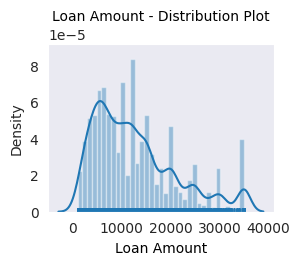

In [31]:
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=10,color='black')
ax.set_xlabel('Loan Amount',fontsize=10,color='black')

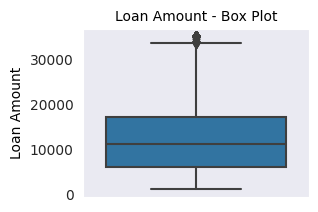

In [32]:
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=10,color='black')
ax.set_ylabel('Loan Amount',fontsize=10,color='black')
plt.show()


In [33]:
# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000


In [34]:
# Univariate Analysis on Intrest Rate-Quantitative Variables
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")

<Figure size 1500x800 with 0 Axes>

Text(0.5, 0, 'Interest Rate')

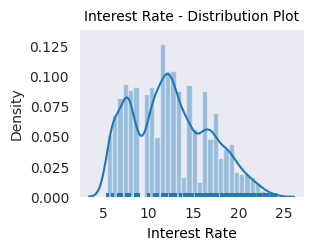

In [35]:
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=10,color='black')
ax.set_xlabel('Interest Rate',fontsize=10,color='black')

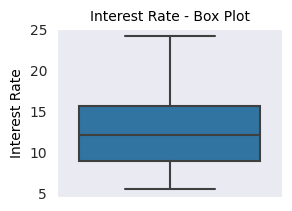

In [36]:
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=10,color='black')
ax.set_ylabel('Interest Rate',fontsize=10,color='black')
plt.show()

In [37]:
# Derived columns
# Loan amounts should be classified into buckets to aid in further bivariate analysis
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])


In [38]:
# Divide annual incomes into buckets to aid in bivariate analysis.
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])


In [39]:
# Divide interest rates into buckets to aid in further analysis in bivariate analysis.
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])


In [40]:
# For bivariate analysis, divide dti into buckets.
loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])


In [41]:
# Bivariate Analysis on annual income against Chargedoff_Proportion

inc_range_vs_loan = loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,48,6,185,239,0.20
1,20000-40000,450,123,1741,2314,0.19
2,40000-60000,558,257,2437,3252,0.17
3,60000-80000,339,193,1875,2407,0.14
4,80000 +,346,299,2472,3117,0.11


In [42]:
# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Noticed that with increase in annual income charged off proportion got decreased.


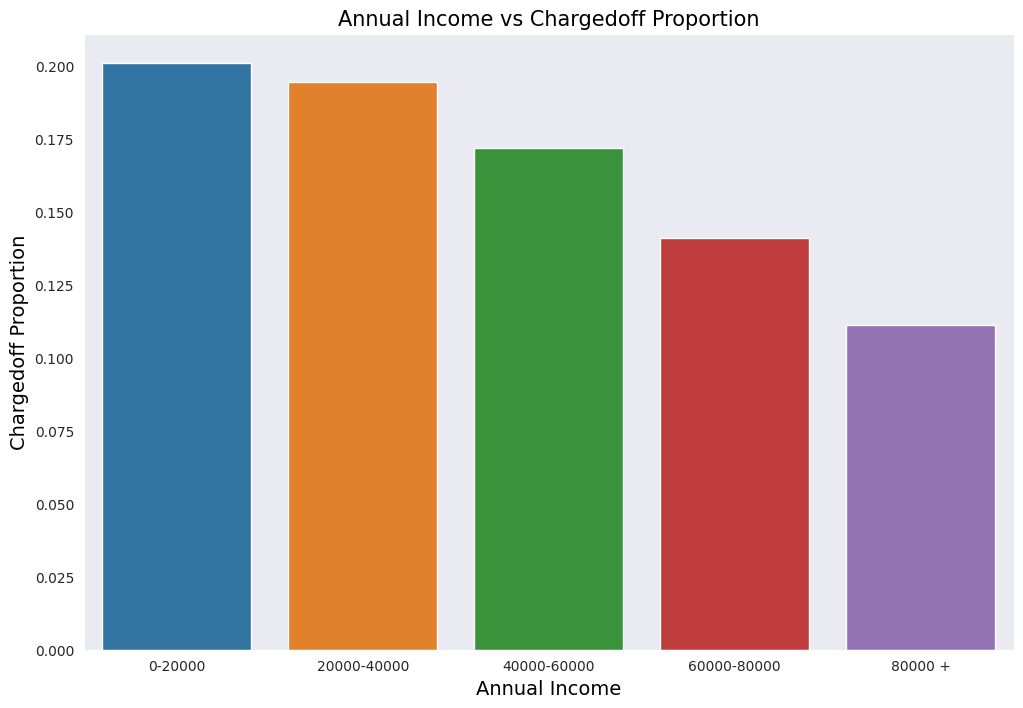

In [43]:
# Lets draw bar plots on data calculated above

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'black')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'black')
ax1.set_xlabel('Annual Income',fontsize=14,color='black')
plt.show()

In [44]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
10,small_business,134,51,316,501,0.27
7,moving,34,4,120,158,0.22
6,medical,37,10,147,194,0.19
8,other,178,106,722,1006,0.18
2,debt_consolidation,952,469,4356,5777,0.16
4,house,18,12,87,117,0.15
0,car,43,32,280,355,0.12
1,credit_card,192,83,1384,1659,0.12
9,renewable_energy,3,1,22,26,0.12
11,vacation,11,4,89,104,0.11


In [45]:
# Observations:
# small Business applicants have high chances of getting charged off.
# renewable_energy where charged off proportion is better as compared to other categories.

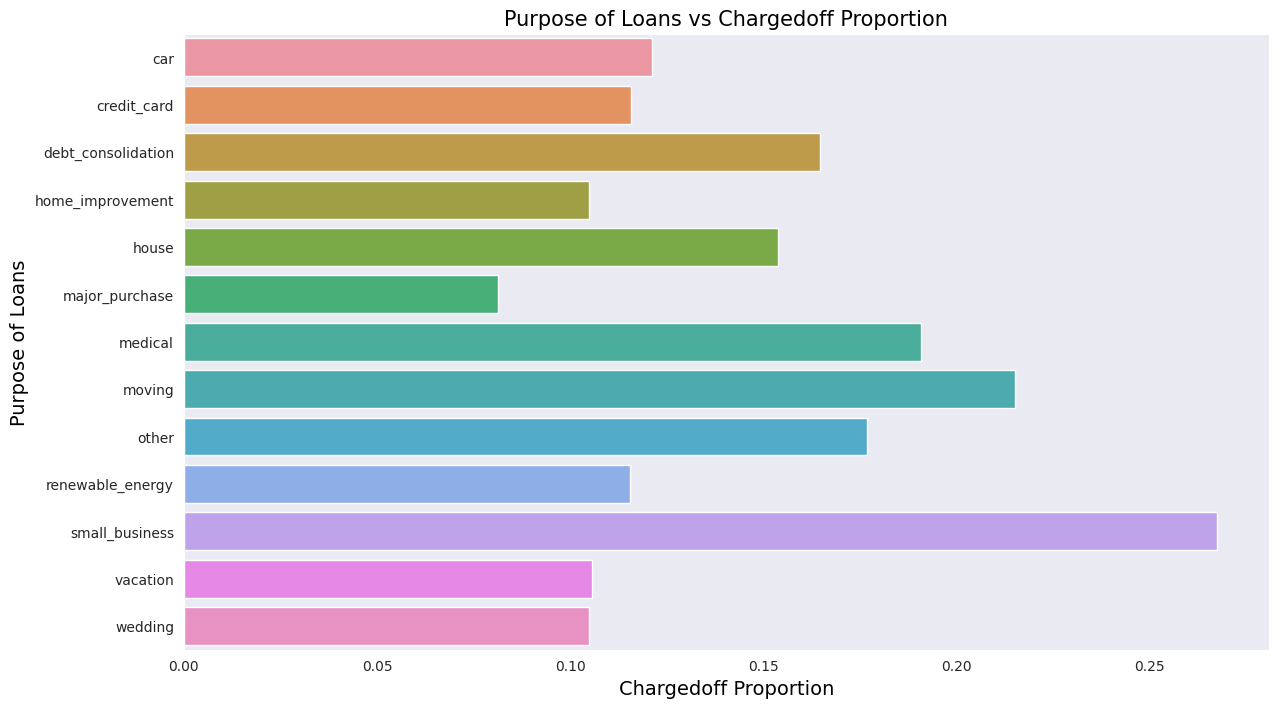

In [46]:
# Lets draw bar plots on data calculated above
# pairs of continuous variables
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='w')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'black')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='black')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'black')
plt.show()

In [47]:
# Bivariate Analysis on Loan Amount against Chargedoff_Proportion -

inc_range_vs_loan = loan.groupby(['loan_amnt_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,loan_amnt_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
4,28000 +,161,122,537,820,0.20
3,21000-28000,165,134,603,902,0.18
2,14000-21000,399,277,1603,2279,0.18
1,7000-14000,522,230,2992,3744,0.14
0,0-7000,495,115,2976,3586,0.14


In [48]:
# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Noticed that with increase in annual income charged off proportion got decreased.

In [49]:
# Bivariate Analysis on Interest Rate against Chargedoff_Proportion -

inc_range_vs_loan = loan.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,503,276,1151,1930,0.26
2,12.5-16,471,251,2036,2758,0.17
1,10-13,311,208,1931,2450,0.13
0,0-10,271,60,3357,3688,0.07


In [50]:
# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

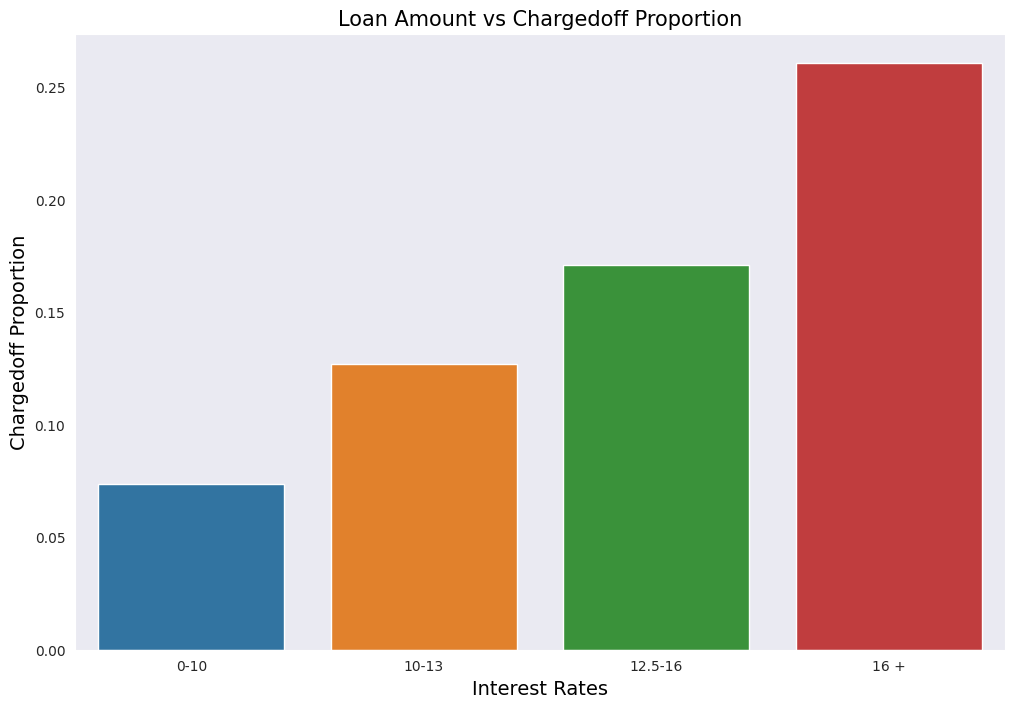

In [51]:
# Bar plot based on data calculated above

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Loan Amount vs Chargedoff Proportion',fontsize=15,color = 'black')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'black')
ax1.set_xlabel('Interest Rates',fontsize=14,color='black')
plt.show()